In [1]:
from trainlib.FileCollection import FileCollection
from trainlib.config import Config
import trainlib.cuts as cuts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import re
from scipy import interpolate
import scipy.integrate as integrate

Welcome to JupyROOT 6.10/09


In [3]:
def WHhadr0j_cut(row):
    return cuts.WHhadr_cut(row) and row["nCleanedJetsPt30"] == 0

def WHhadr01j_cut(row):
    return cuts.WHhadr_cut(row) and (row["nCleanedJetsPt30"] == 0 or row["nCleanedJetsPt30"] == 1)

def WHhadr1j_cut(row):
    return cuts.WHhadr_cut(row) and row["nCleanedJetsPt30"] == 1

def WHhadr2j_cut(row):
    return cuts.WHhadr_cut(row) and row["nCleanedJetsPt30"] >= 2

def ZHhadr0j_cut(row):
    return cuts.ZHhadr_cut(row) and row["nCleanedJetsPt30"] == 0

def ZHhadr01j_cut(row):
    return cuts.ZHhadr_cut(row) and (row["nCleanedJetsPt30"] == 0 or row["nCleanedJetsPt30"] == 1)

def ZHhadr1j_cut(row):
    return cuts.ZHhadr_cut(row) and row["nCleanedJetsPt30"] == 1

def ZHhadr2j_cut(row):
    return cuts.ZHhadr_cut(row) and row["nCleanedJetsPt30"] >= 2

def mZZ0j_cut(row):
    return cuts.mZZ_cut(row) and row["nCleanedJetsPt30"] == 0

def mZZ01j_cut(row):
    return cuts.mZZ_cut(row) and (row["nCleanedJetsPt30"] == 0 or row["nCleanedJetsPt30"] == 1)

def mZZ1j_cut(row):
    return cuts.mZZ_cut(row) and row["nCleanedJetsPt30"] == 1

def mZZ2j_cut(row):
    return cuts.mZZ_cut(row) and row["nCleanedJetsPt30"] >= 2

In [5]:
MC_path = "/data_CMS/cms/wind/CJLST_NTuples/"


In [6]:
collections = {"VBF2j": {MC_path + "VBFH125/ZZ4lAnalysis.root": mZZ2j_cut},
            "VBF1j": {MC_path + "VBFH125/ZZ4lAnalysis.root": mZZ1j_cut},
            "VBF0j": {MC_path + "VBFH125/ZZ4lAnalysis.root": mZZ0j_cut},
            "VBF01j": {MC_path + "VBFH125/ZZ4lAnalysis.root": mZZ01j_cut},
            "VBF": {MC_path + "VBFH125/ZZ4lAnalysis.root": cuts.mZZ_cut},
            "ggH2j": {MC_path + "ggH125/ZZ4lAnalysis.root": mZZ2j_cut},
            "ggH1j": {MC_path + "ggH125/ZZ4lAnalysis.root": mZZ1j_cut},
            "ggH0j": {MC_path + "ggH125/ZZ4lAnalysis.root": mZZ0j_cut},
            "ggH01j": {MC_path + "ggH125/ZZ4lAnalysis.root": mZZ01j_cut},
            "ggH" : {MC_path + "ggH125/ZZ4lAnalysis.root": cuts.mZZ_cut},
            "WHh2j": {MC_path + "WplusH125/ZZ4lAnalysis.root": WHhadr2j_cut, MC_path + "WminusH125/ZZ4lAnalysis.root": WHhadr2j_cut},
            "WHh1j": {MC_path + "WplusH125/ZZ4lAnalysis.root": WHhadr1j_cut, MC_path + "WminusH125/ZZ4lAnalysis.root": WHhadr1j_cut},
            "WHh0j": {MC_path + "WplusH125/ZZ4lAnalysis.root": WHhadr0j_cut, MC_path + "WminusH125/ZZ4lAnalysis.root": WHhadr0j_cut},
            "WHh": {MC_path + "WplusH125/ZZ4lAnalysis.root": cuts.WHhadr_cut, MC_path + "WminusH125/ZZ4lAnalysis.root": cuts.WHhadr_cut},
            "WHh01j": {MC_path + "WplusH125/ZZ4lAnalysis.root": WHhadr01j_cut, MC_path + "WminusH125/ZZ4lAnalysis.root": WHhadr01j_cut},
            "WHl": {MC_path + "WplusH125/ZZ4lAnalysis.root": cuts.WHlept_cut, MC_path + "WminusH125/ZZ4lAnalysis.root": cuts.WHlept_cut},
            "ZHh2j": {MC_path + "ZH125/ZZ4lAnalysis.root": ZHhadr2j_cut},
            "ZHh1j": {MC_path + "ZH125/ZZ4lAnalysis.root": ZHhadr1j_cut},
            "ZHh01j": {MC_path + "ZH125/ZZ4lAnalysis.root": ZHhadr01j_cut},
            "ZHh0j": {MC_path + "ZH125/ZZ4lAnalysis.root": ZHhadr0j_cut},
            "ZHh": {MC_path + "ZH125/ZZ4lAnalysis.root": cuts.ZHhadr_cut},
            "ZHl": {MC_path + "ZH125/ZZ4lAnalysis.root": cuts.ZHlept_cut},
            "ttHh": {MC_path + "ttH125/ZZ4lAnalysis.root": cuts.ttHhadr_cut},
            "ttHl": {MC_path + "ttH125/ZZ4lAnalysis.root": cuts.ttHlept_cut},
            "ZHMET": {MC_path + "ZH125/ZZ4lAnalysis.root": cuts.ZHMET_cut}
          }

In [7]:
H1_coll = FileCollection(collections["WHh1j"], 0.0, 0.5)

skimming /data_CMS/cms/wind/CJLST_NTuples/WminusH125/ZZ4lAnalysis.root
skimming /data_CMS/cms/wind/CJLST_NTuples/WplusH125/ZZ4lAnalysis.root
collection set up: 2 files, 56636 entries in total, 28317 of which will be used


In [8]:
H0_coll = FileCollection(collections["ZHh1j"], 0.0, 0.5)

skimming /data_CMS/cms/wind/CJLST_NTuples/ZH125/ZZ4lAnalysis.root
collection set up: 1 files, 61210 entries in total, 30605 of which will be used


In [9]:
candidate_branches = ["PFMET", "nCleanedJetsPt30", "nCleanedJetsPt30BTagged_bTagSF", "nExtraLep", "ZZMass", "nExtraZ", "Z1Mass", "Z2Mass", "Z1Pt", "Z2Pt", "ZZMassErr", "ZZPt", "ZZEta", "ZZPhi", "Z1Flav", "Z2Flav", "costhetastar", "helphi", "helcosthetaZ1", "helcosthetaZ2", "phistarZ1", "phistarZ2", "xi", "xistar"]
MELA_branches = ["D_VBF2j_ggH_ME", "D_VBF1j_ggH_ME", "D_WHh_ggH_ME", "D_ZHh_ggH_ME", "D_WHh_ZHh_ME", "D_VBF2j_WHh_ME", "D_VBF2j_ZHh_ME"]
list_branches = ["Jet", "Lep", "ExtraLep"]

In [12]:
allbranches = ["JetPt", "JetEta", "JetPhi", "LepPt", "LepEta", "LepPhi", "ExtraLepPt", "ExtraLepEta", "ExtraLepPhi"] + candidate_branches + MELA_branches + ["LHEAssociatedParticleId", "GenAssocLep1Id", "GenAssocLep2Id", "training_weight"]

In [10]:
complete_list_branches = [list_branches + postfix for list_branches in list_branches for postfix in ["Pt", "Eta", "Phi"]]

In [14]:
H1_df = H1_coll.get_data(allbranches, 0.0, 0.5)
H0_df = H0_coll.get_data(allbranches, 0.0, 0.5)

In [15]:
def get_binned_data(df, branch):
    data = df[branch].as_matrix()
    weights = df["training_weight"].as_matrix()
    
    # set the bin width
    q75, q25 = np.percentile(data, [75, 25])
    bin_width = max(2 * (q75 - q25) / len(data)**0.33, 0.005)

    data_max = np.max(data)
    data_min = np.min(data)
    bins = np.arange(data_min, data_max + bin_width, bin_width)
    
    weights = weights / (np.sum(weights) * bin_width)
    
    hist = np.histogram(data, bins = bins, weights = weights)
    return hist

In [34]:
def get_interpolating_function(data, bins):
    bin_centers = [np.mean([bins[i], bins[i + 1]]) for i in range(len(bins) - 1)]
    intf = interpolate.interp1d(bin_centers, data, kind = "cubic")
    interpolated_function = lambda x: intf(x) if x > bin_centers[0] and x < bin_centers[-1] else 0
    
    return interpolated_function

In [20]:
data_H1, bins_H1 = get_binned_data(H1_df, "D_VBF1j_ggH_ME")

In [21]:
data_H0, bins_H0 = get_binned_data(H0_df, "D_VBF1j_ggH_ME")

In [35]:
H1_func = get_interpolating_function(data_H1, bins_H1)

In [36]:
H0_func = get_interpolating_function(data_H0, bins_H0)

In [37]:
integrate.quad(H1_func, 118, 130)

(0.0, 0.0)

In [43]:
x = np.arange(0.0, 1.0, 0.01)

In [44]:
y_H1 = [H1_func(xx) for xx in x]

In [47]:
y_H0 = [H0_func(xx) for xx in x]

In [48]:
plt.plot(x,y_H1, label = "H1")

In [49]:
plt.plot(x,y_H0, label = "H0")

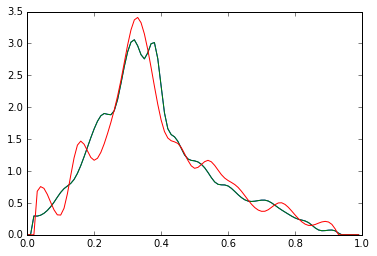

In [50]:
plt.show()

In [32]:
separation_func = lambda x: (H1_func(x) + H0_func(x)) * (H1_func(x) - H0_func(x))**2

sep = integrate.quad(separation_func, 0.0, 1.0)

/cvmfs/cms.cern.ch/slc6_amd64_gcc630/external/py2-pippkgs_depscipy/3.0-fmblme3/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [33]:
sep

(0.1191775008775731, 0.00022655316460787334)